In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0



Классы в тренировочном наборе:
Всего классов: 10
Распределение по классам:
Класс 0: 5923 экземпляров
Класс 1: 6742 экземпляров
Класс 2: 5958 экземпляров
Класс 3: 6131 экземпляров
Класс 4: 5842 экземпляров
Класс 5: 5421 экземпляров
Класс 6: 5918 экземпляров
Класс 7: 6265 экземпляров
Класс 8: 5851 экземпляров
Класс 9: 5949 экземпляров


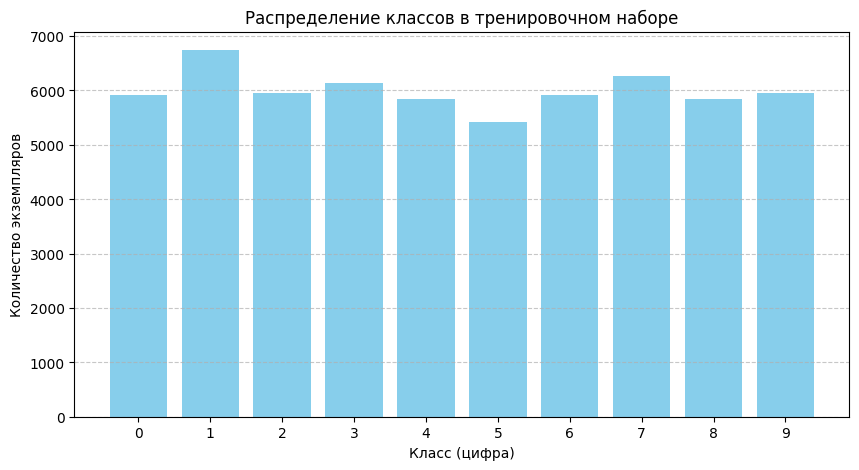


Классы в тестовом наборе:
Всего классов: 10
Распределение по классам:
Класс 0: 980 экземпляров
Класс 1: 1135 экземпляров
Класс 2: 1032 экземпляров
Класс 3: 1010 экземпляров
Класс 4: 982 экземпляров
Класс 5: 892 экземпляров
Класс 6: 958 экземпляров
Класс 7: 1028 экземпляров
Класс 8: 974 экземпляров
Класс 9: 1009 экземпляров


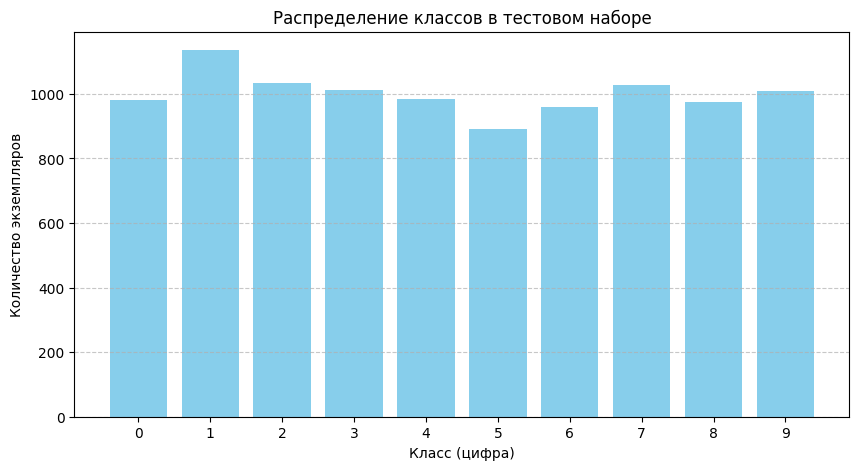

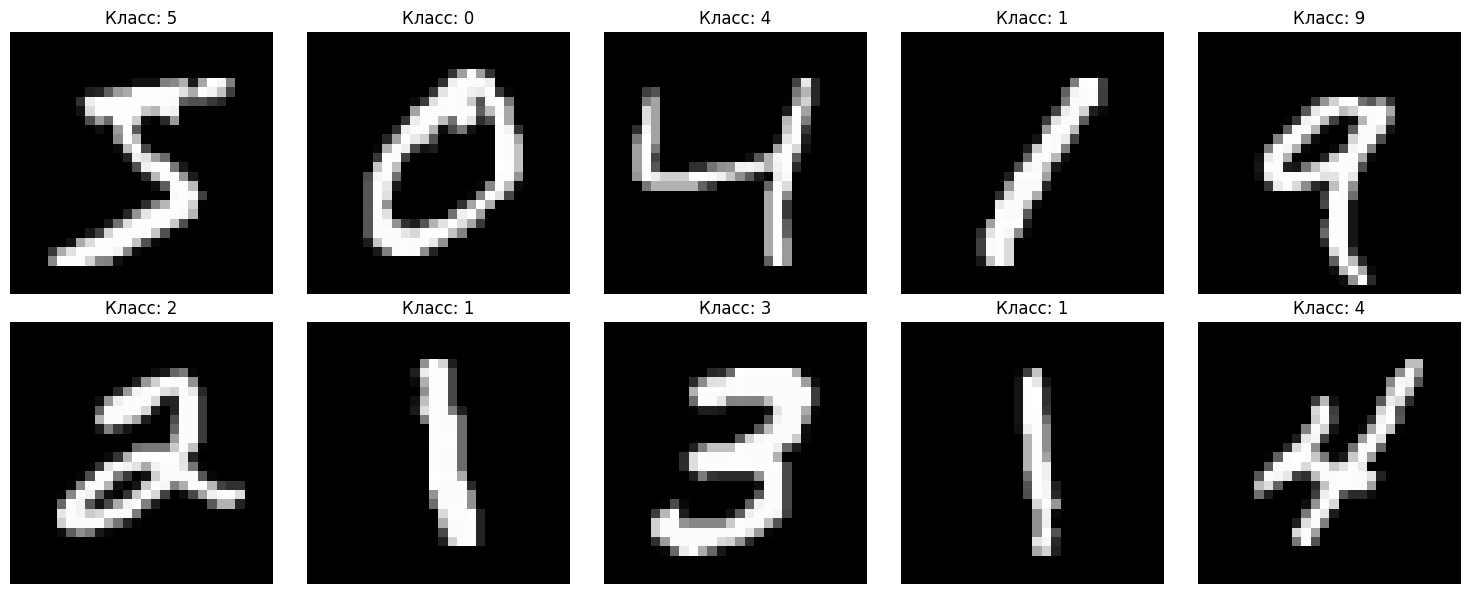

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
y_train (one-hot) shape: (60000, 10)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
y_test (one-hot) shape: (10000, 10)




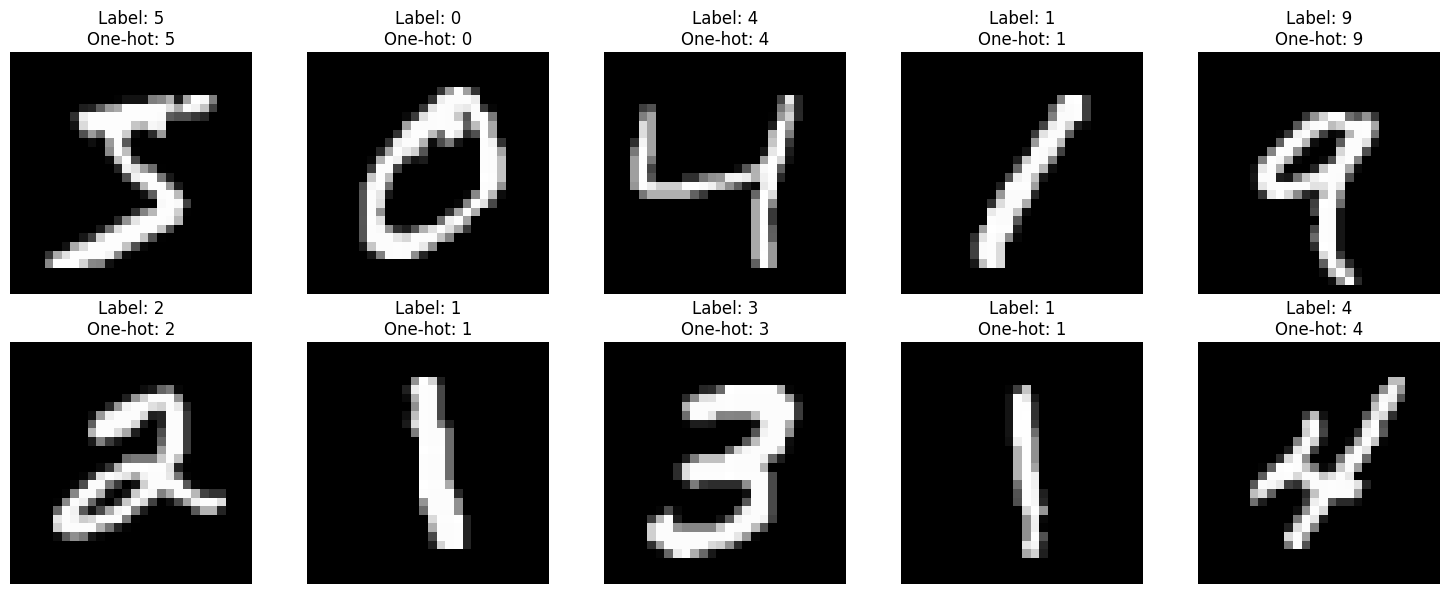

In [ ]:
# импорт библиотек
import tensorflow as tf
from tensorflow.keras.datasets import mnist           # MNIST — база рукописных цифр
from tensorflow.keras.utils import to_categorical     # Для one-hot кодирования меток
import matplotlib.pyplot as plt                       # Для визуализации
import numpy as np                                    # Для работы с массивами

# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Функция для вывода информации о классах и визуализации распределения
def print_class_distribution(labels, dataset_name):
    unique_classes, counts = np.unique(labels, return_counts=True)
    print(f"\nКлассы в {dataset_name}:")
    print(f"Всего классов: {len(unique_classes)}")
    print("Распределение по классам:")
    for cls, count in zip(unique_classes, counts):
        print(f"Класс {cls}: {count} экземпляров")

    # Визуализация распределения по классам
    plt.figure(figsize=(10, 5))
    plt.bar(unique_classes, counts, color='skyblue')
    plt.title(f'Распределение классов в {dataset_name}')
    plt.xlabel('Класс (цифра)')
    plt.ylabel('Количество экземпляров')
    plt.xticks(unique_classes)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Вывод распределения классов для обучающей и тестовой выборки
print_class_distribution(y_train, "тренировочном наборе")
print_class_distribution(y_test, "тестовом наборе")

# Визуализация первых 10 изображений из обучающего набора
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Класс: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Нормализация изображений (приведение пикселей к диапазону [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot кодирование меток классов
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

# Изменение формы изображений для подачи в сверточную нейросеть (CNN)
x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test.reshape(-1, 28, 28, 1)

# Проверка форм массивов
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("y_train (one-hot) shape:", y_train_onehot.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("y_test (one-hot) shape:", y_test_onehot.shape)
print("\n")

# Повторная визуализация первых 10 изображений с метками и one-hot
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}\nOne-hot: {np.argmax(y_train_onehot[i])}')
    plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
# Создание модели нейронной сети
model = tf.keras.models.Sequential([
    #  Преобразование 2D-изображений (28x28) в 1D-вектор (784) для Dense-слоя
  tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Полносвязный (Dense) слой с 128 нейронами и функцией активации ReLU
  tf.keras.layers.Dense(128, activation='relu'),
    # Dropout — регуляризация: случайно отключает 20% нейронов во время обучения
  tf.keras.layers.Dropout(0.2),
    # Выходной слой: 10 нейронов (по количеству классов), без softmax
  tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Получение предсказаний от модели для одного изображения из обучающего набора
# model(x_train[:1]) — подаём первое изображение (размерность: 1x28x28)
# .numpy() — преобразуем результат из TensorFlow тензора в обычный массив NumPy
predictions = model(x_train[:1]).numpy()
# Вывод "сырых" предсказаний (логитов) модели для 10 классов
predictions

array([[ 0.11676299,  0.22891605, -0.18148702,  0.33151835,  0.8307562 ,
         0.329605  ,  0.12907264, -0.6044359 , -0.08579713, -0.548512  ]],
      dtype=float32)

In [ ]:
# Определяем функцию потерь (loss function)
# Используем SparseCategoricalCrossentropy, так как метки — целые числа (не one-hot)
# from_logits=True означает, что модель возвращает логиты (не вероятности),
# поэтому softmax будет применён внутри функции потерь
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
# Вычисляем значение функции потерь для одного примера из тренировочного набора
# y_train[:1] — правильная метка (целевая переменная)
# predictions — предсказания модели (логиты)
# .numpy() — преобразует результат из тензора в число NumPy
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.1104279)

In [ ]:
# Компилируем модель:
# - оптимизатор: Adam (адаптивный градиентный спуск)
# - функция потерь: SparseCategoricalCrossentropy (работает с целыми метками)
# - метрика: точность (accuracy)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
# метод Model.fit для настройки параметров модели и минимизации потерь
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8566 - loss: 0.4940
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9557 - loss: 0.1548
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9664 - loss: 0.1115
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9725 - loss: 0.0901
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9758 - loss: 0.0778


In [ ]:
# Метод Model.evaluate проверяет производительность модели, обычно на проверочном или тестовом наборе.
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9756 - loss: 0.0775


[0.07750369608402252, 0.975600004196167]

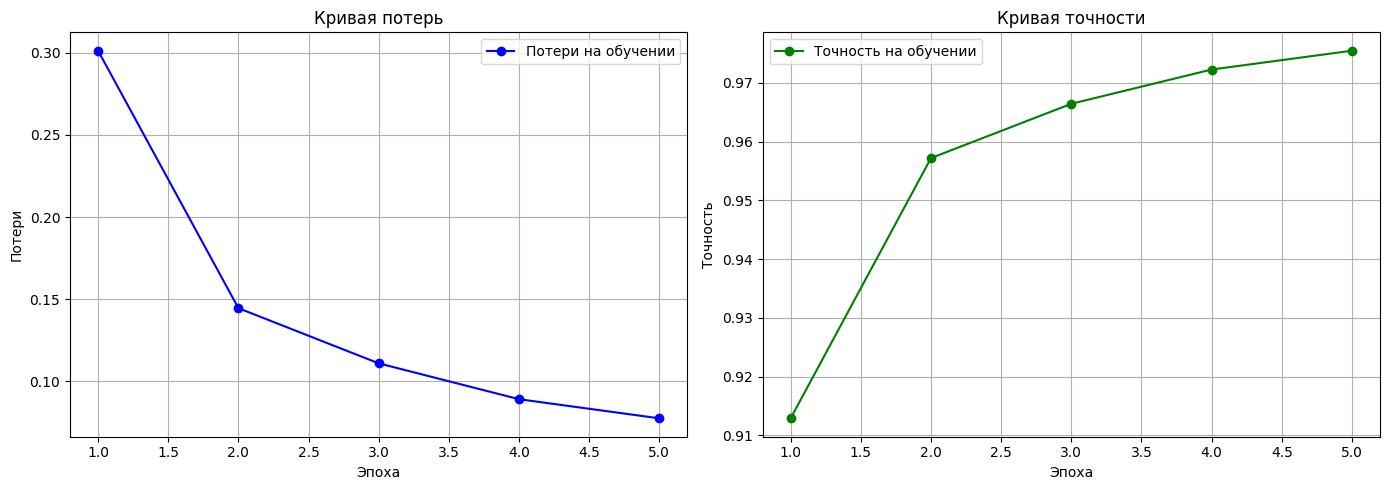

In [ ]:
import matplotlib.pyplot as plt

# Из истории обучения (объект history), получаем словарь с метриками
history_dict = history.history

# Потери и точность на обучении
loss = history_dict['loss']
accuracy = history_dict['accuracy']

# Количество эпох
epochs = range(1, len(loss) + 1)

# График потерь
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Потери на обучении')  # 'bo-' — blue circle + line
plt.title('Кривая потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.grid(True)
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'go-', label='Точность на обучении')  # 'go-' — green circle + line
plt.title('Кривая точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Создаем модель, которая добавляет слой Softmax к существующей модели для получения вероятностей классов
# probability_model принимает выходы модели (логиты) и преобразует их в вероятности с помощью Softmax
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
# Получаем вероятности классов для первых 5 примеров из тестового набора с помощью модели probability_model
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.0125213e-07, 5.0125516e-07, 2.1502352e-05, 1.3788968e-04,
        3.4993461e-10, 3.6649118e-07, 3.3846786e-13, 9.9983847e-01,
        2.3951651e-07, 8.4530399e-07],
       [4.3325616e-07, 1.8345661e-03, 9.9811435e-01, 4.9284630e-05,
        9.7588888e-14, 1.2056089e-06, 9.8720903e-08, 1.4204490e-13,
        3.1896793e-08, 5.1900970e-11],
       [1.3876836e-08, 9.9949026e-01, 8.8146589e-05, 5.2623892e-07,
        2.8651362e-05, 5.8435393e-07, 2.0126681e-06, 3.2144098e-04,
        6.8311776e-05, 6.1992345e-08],
       [9.9996161e-01, 4.1187640e-09, 2.7895250e-05, 1.5414891e-07,
        1.3395869e-07, 6.7127353e-06, 1.5709129e-06, 1.5547389e-06,
        4.0606798e-10, 3.8852460e-07],
       [1.6374026e-05, 4.0285490e-09, 8.3091778e-05, 1.5712138e-07,
        9.9464440e-01, 7.2926355e-06, 1.1386233e-04, 6.2500869e-05,
        1.2821245e-05, 5.0595105e-03]], dtype=float32)>

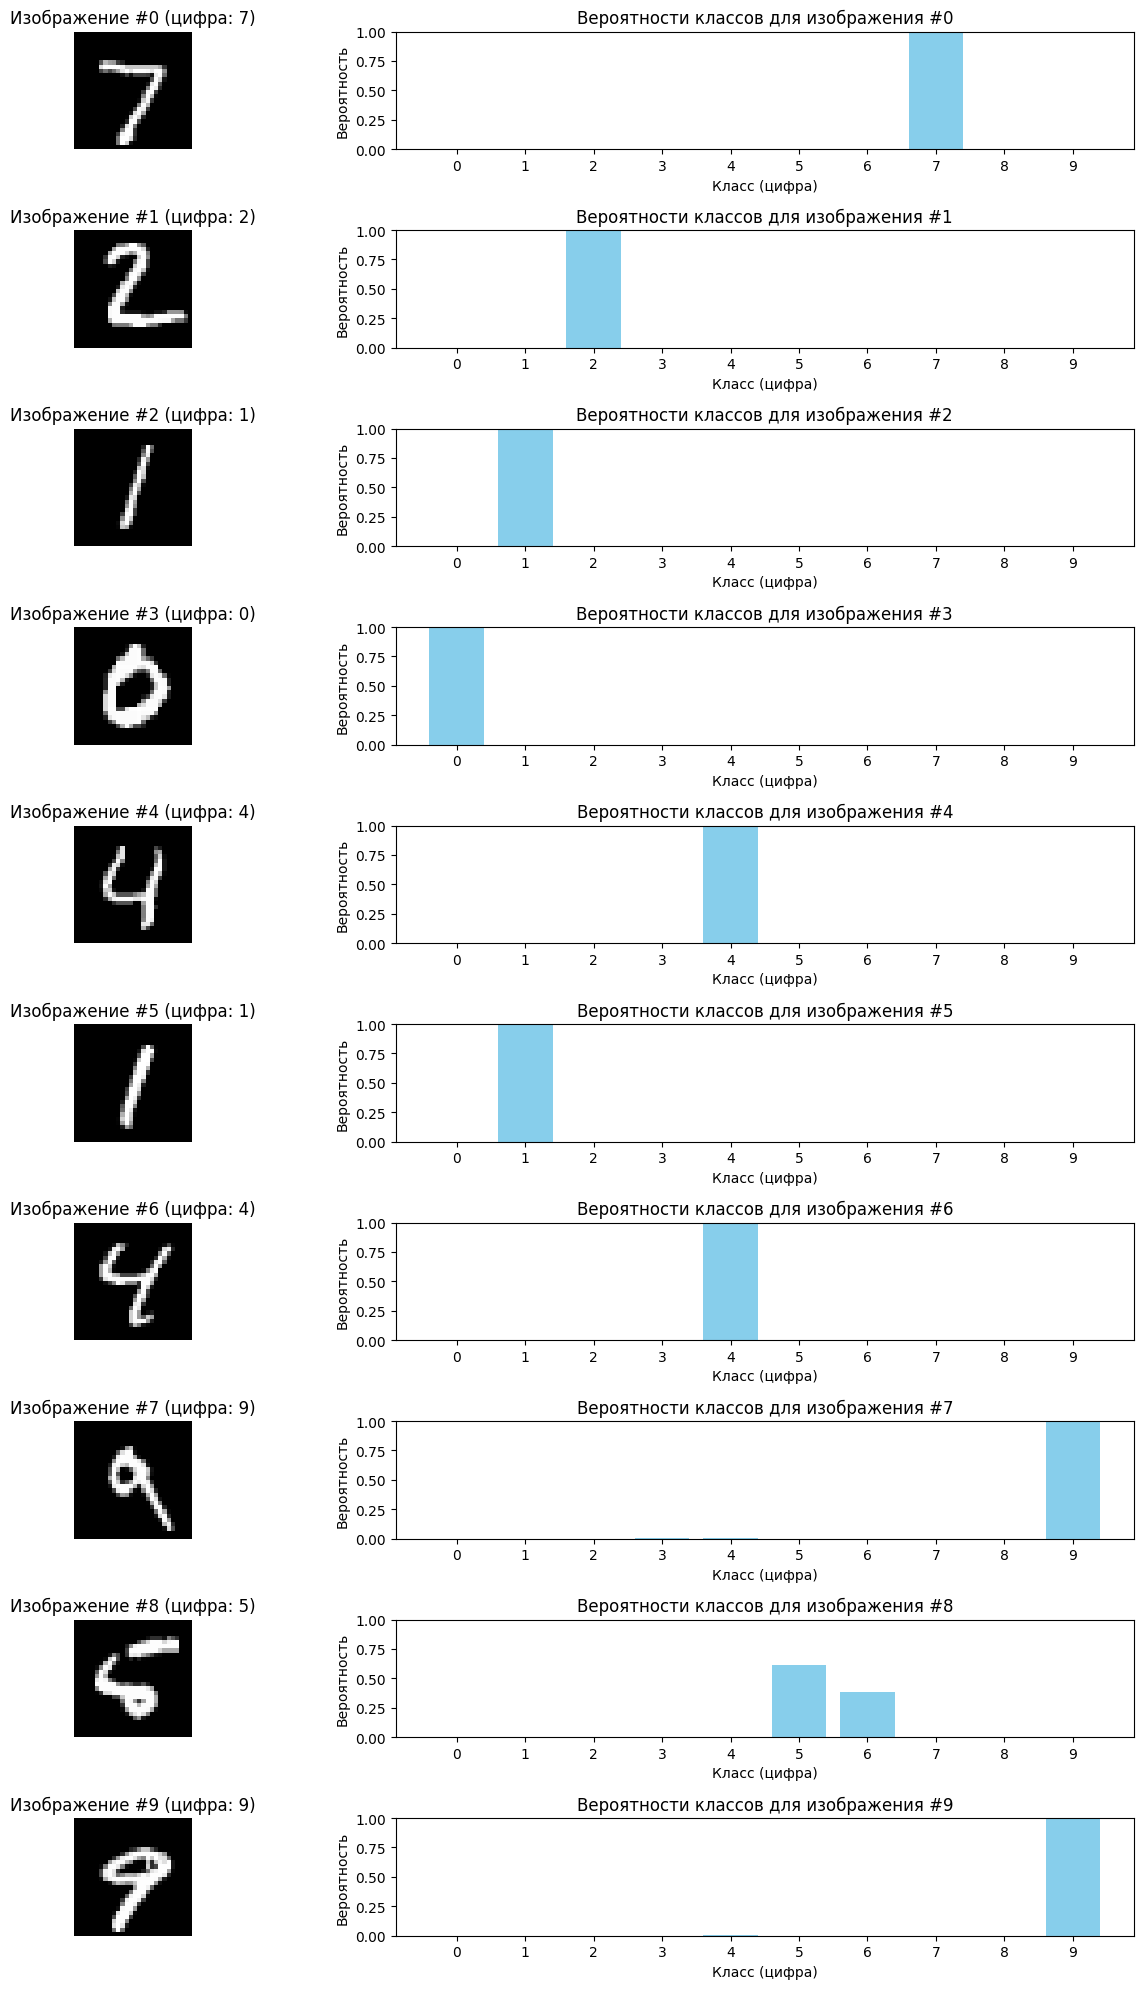

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Получаем вероятности для первых 10 изображений
probs = probability_model(x_test[:10]).numpy()

plt.figure(figsize=(14, 20))  # увеличиваем размер, чтобы поместились 10 пар графиков

for i in range(10):
    # Показываем изображение
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Изображение #{i} (цифра: {y_test[i]})')
    plt.axis('off')

    # Показываем вероятности классов
    plt.subplot(10, 2, 2*i+2)
    plt.bar(range(10), probs[i], color='skyblue')
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.title(f'Вероятности классов для изображения #{i}')
    plt.xlabel('Класс (цифра)')
    plt.ylabel('Вероятность')

plt.tight_layout()
plt.show()

